# EDA with Python using Forbes 2022 Dataset

Hi Guys, Welcome to [Tirendaz Academy](https://youtube.com/c/tirendazacademy) 😀
In this notebook, I'm going to talk about EDA with Python. Happy learning 🐱‍🏍 

## Loading Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("forbes_2022_billionaires.csv")

In [3]:
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [4]:
df.shape

(2668, 22)

In [5]:
df.columns

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

## Data Preprocessing

In [6]:
df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]

In [7]:
df.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [8]:
df = df.set_index("rank")

In [9]:
df.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [10]:
df.dtypes

personName     object
age           float64
finalWorth    float64
category       object
country        object
gender         object
dtype: object

In [11]:
df.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(2568, 6)

## The genders of the richest 

In [14]:
df["gender"].value_counts()

M    2282
F     286
Name: gender, dtype: int64

In [15]:
df["gender"].value_counts(normalize=True)

M    0.888629
F    0.111371
Name: gender, dtype: float64

In [16]:
df_gender = df.groupby(["gender"])

In [17]:
df_gender["age"].mean()

gender
F    62.937063
M    64.409290
Name: age, dtype: float64

In [18]:
import seaborn as sns
sns.set_theme()
sns.set(rc = {"figure.dpi":300})

<AxesSubplot:xlabel='gender'>

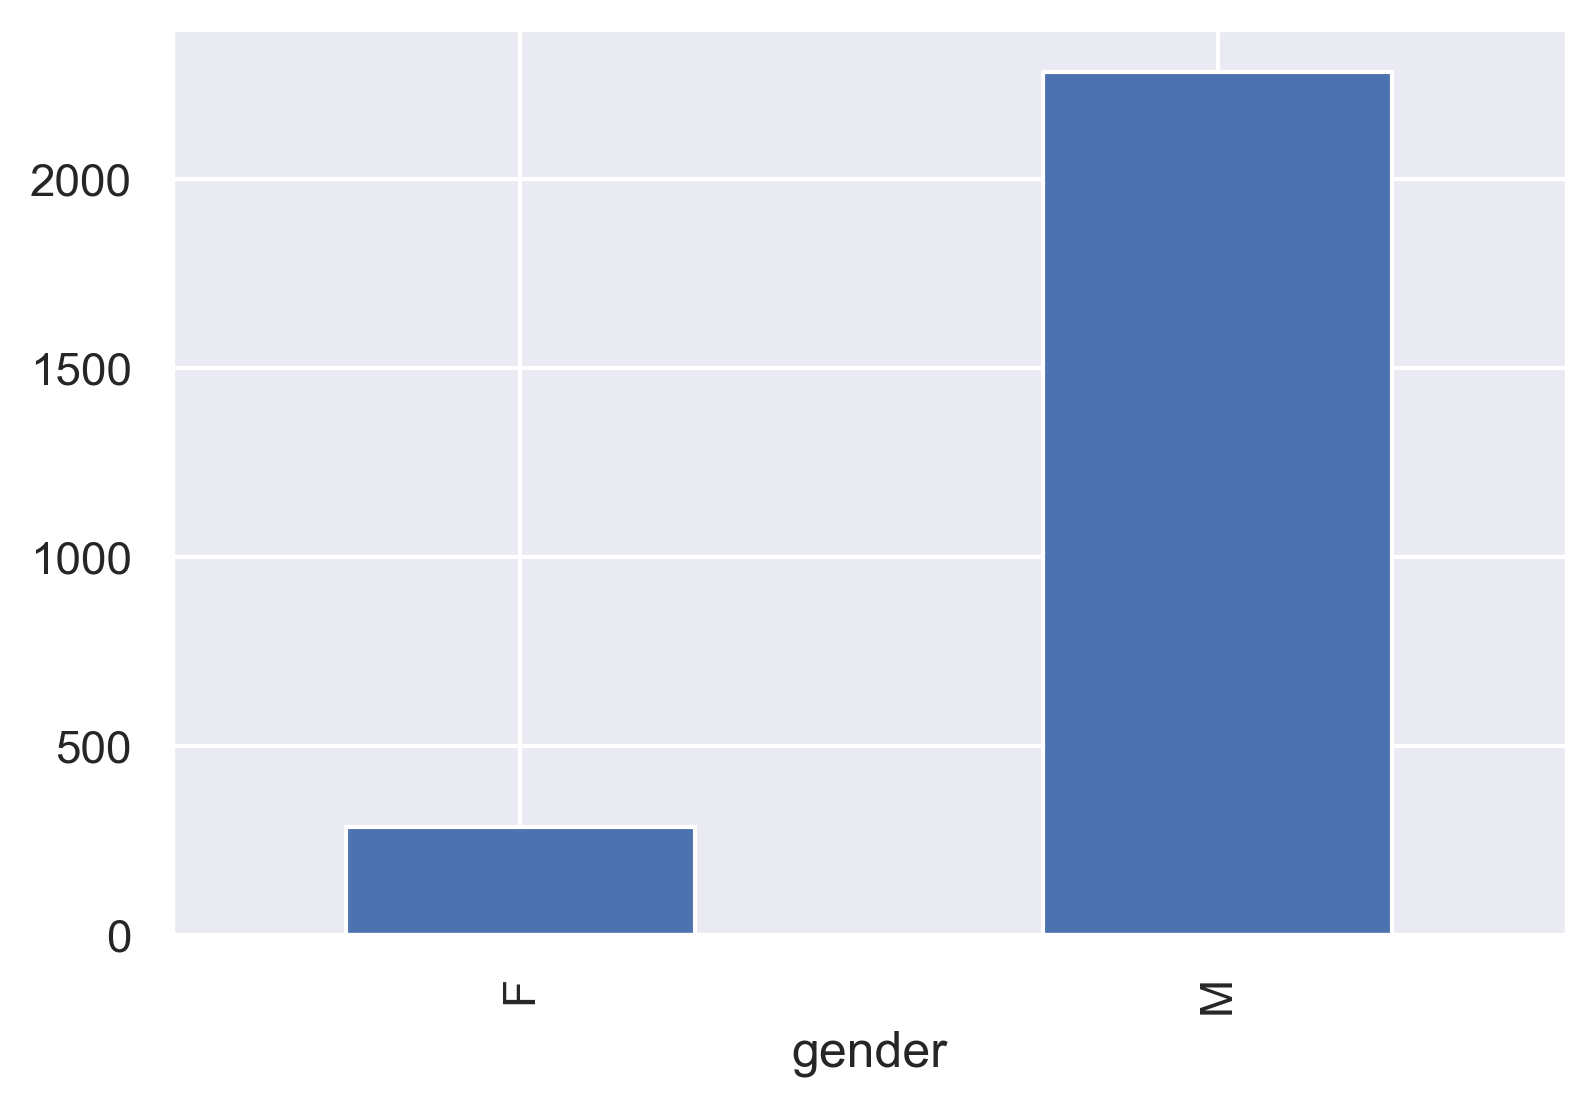

In [19]:
df_gender.size().plot(kind = "bar")

## Who are the top 10 richest in the world?

<AxesSubplot:xlabel='finalWorth', ylabel='personName'>

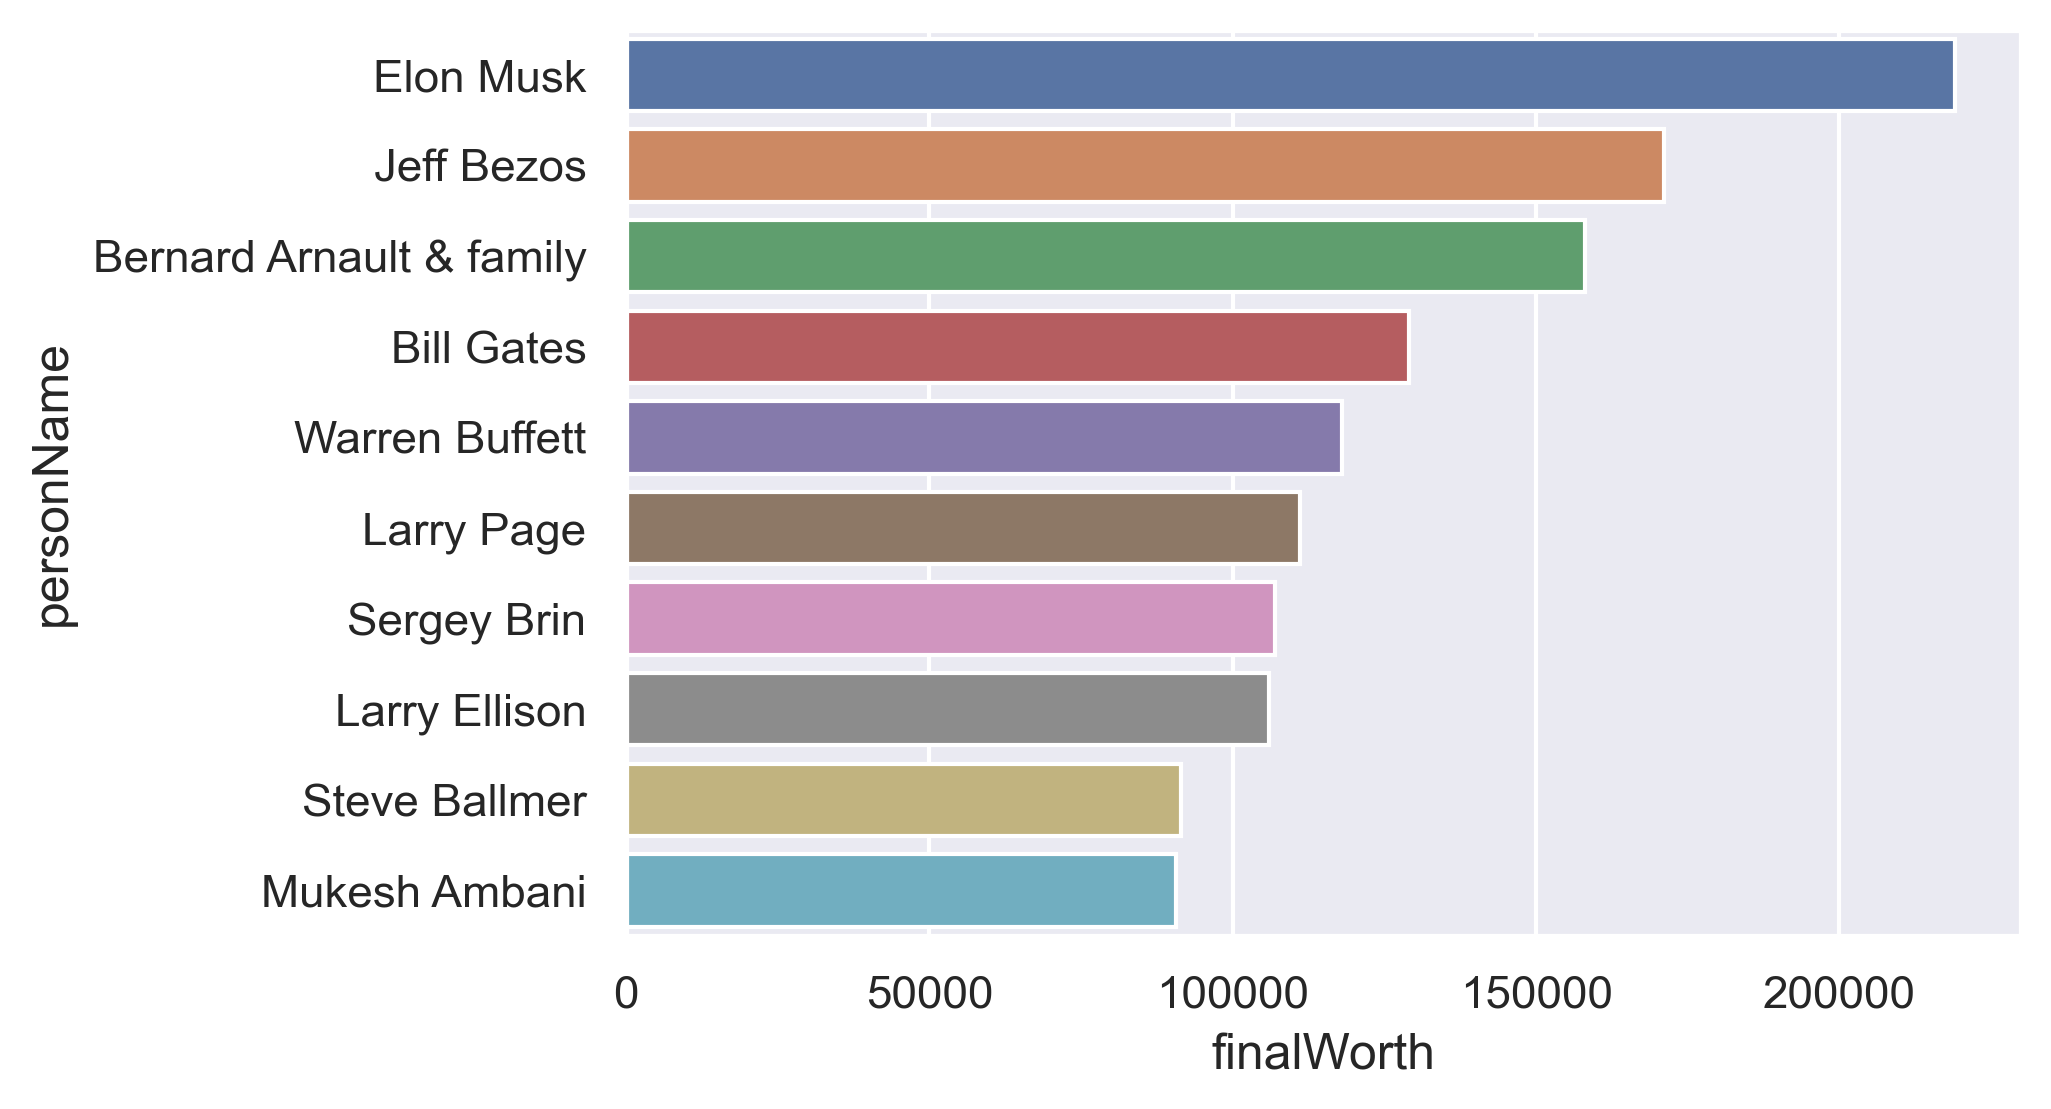

In [20]:
sns.barplot(y=df["personName"][:10], x = df["finalWorth"][:10])

## Which country has the highest number of billionaires?

In [21]:
len(df["country"].unique())

73

In [22]:
df_country = df.groupby("country")

In [23]:
df_country_count = pd.DataFrame(
    df_country.size().sort_values(ascending=False), columns=["Count"])

In [24]:
df_country_count.head()

,Count
country,
United States,742
China,546
India,154
Germany,94
United Kingdom,81


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count', ylabel='country'>

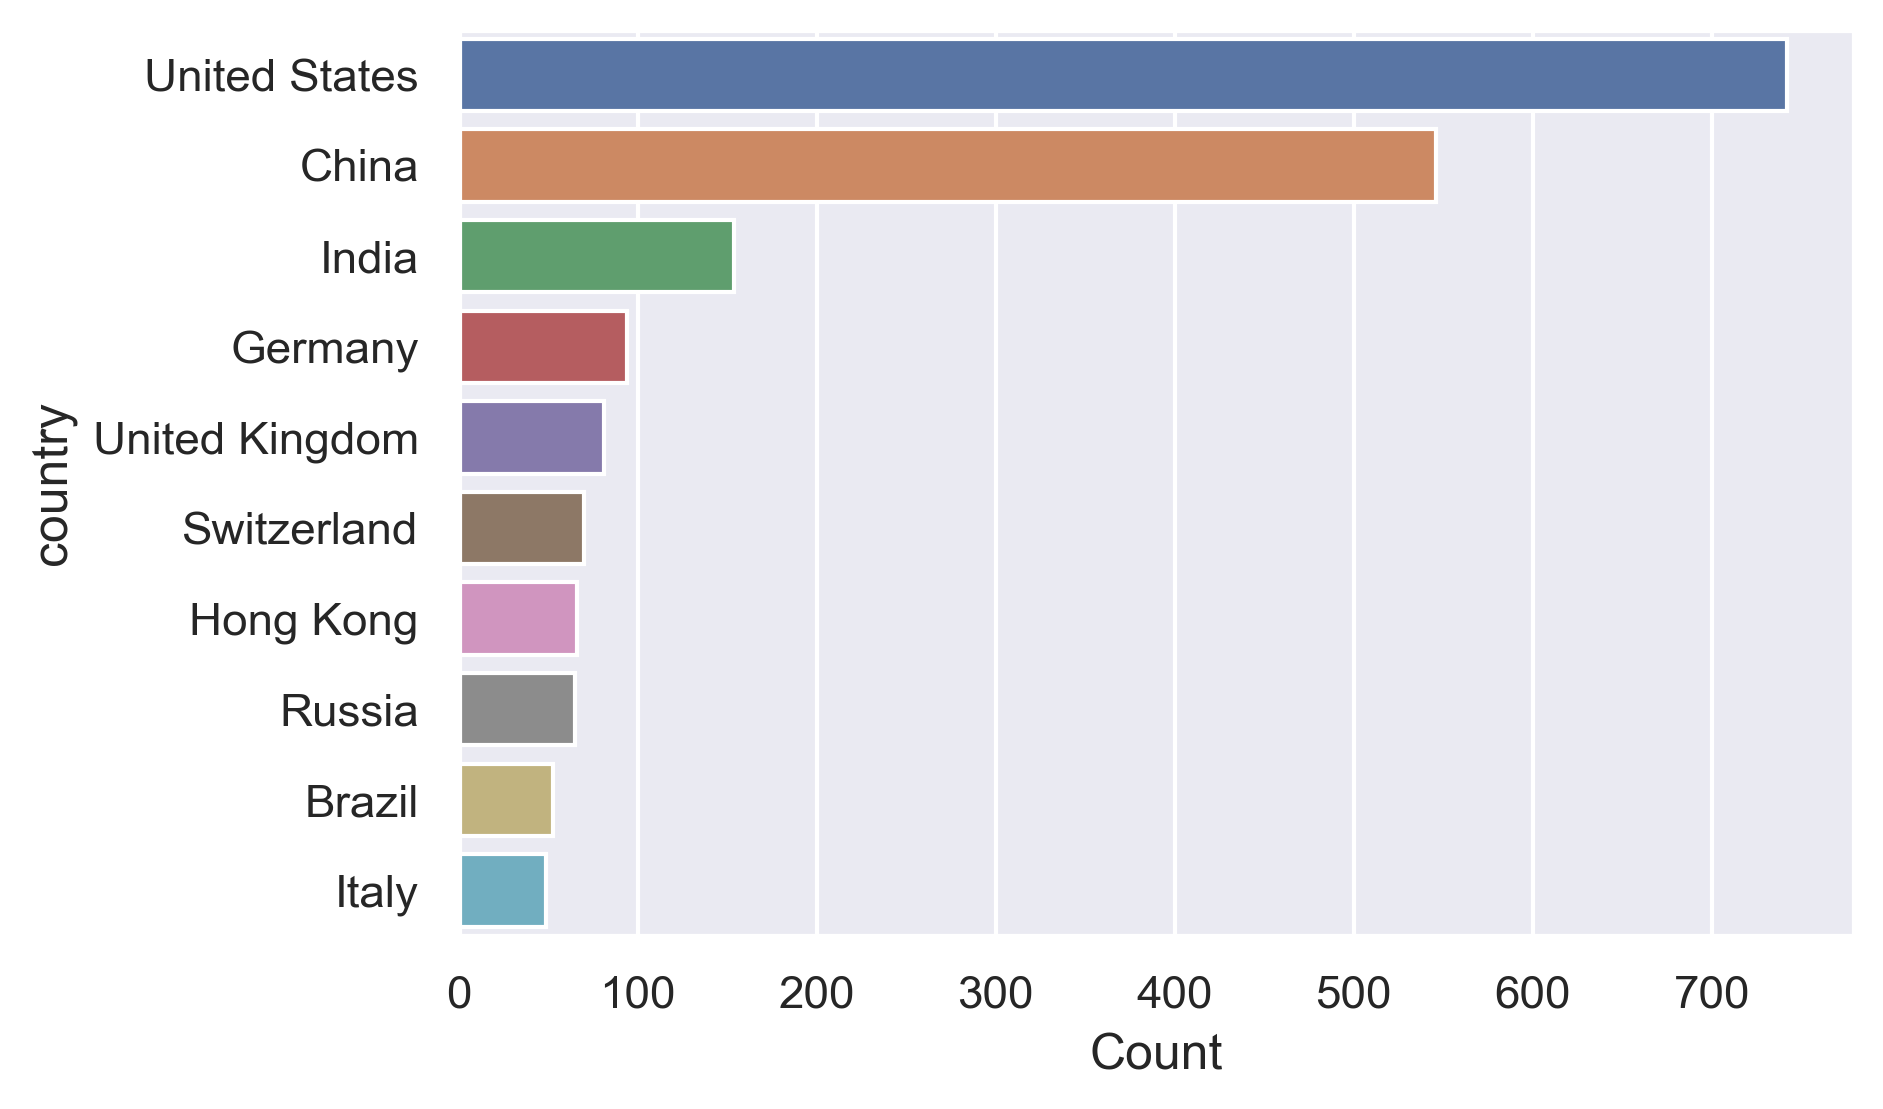

In [25]:
sns.barplot(df_country_count["Count"][:10], df_country_count.index[:10])

## Which industry has the most billionaires in it?

In [26]:
df["category"].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [27]:
df["category"]=df["category"].apply(lambda x:x.replace(" ","")).\
    apply(lambda x:x.replace("&","_"))

In [28]:
df["category"].unique()

array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [29]:
df_category = df.groupby("category").size()

In [30]:
df_category.head()

category
Automotive                   66
Construction_Engineering     45
Diversified                 174
Energy                       93
Fashion_Retail              238
dtype: int64

In [31]:
df_category = df_category.to_frame()

In [32]:
df_category.head()

,0
category,
Automotive,66
Construction_Engineering,45
Diversified,174
Energy,93
Fashion_Retail,238


In [33]:
df_category=df_category.rename(columns = {0:"Count"}).\
    sort_values(by = "Count", ascending=False)

In [34]:
df_category.head()

,Count
category,
Finance_Investments,381
Technology,332
Manufacturing,319
Fashion_Retail,238
Healthcare,209


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Count', ylabel='category'>

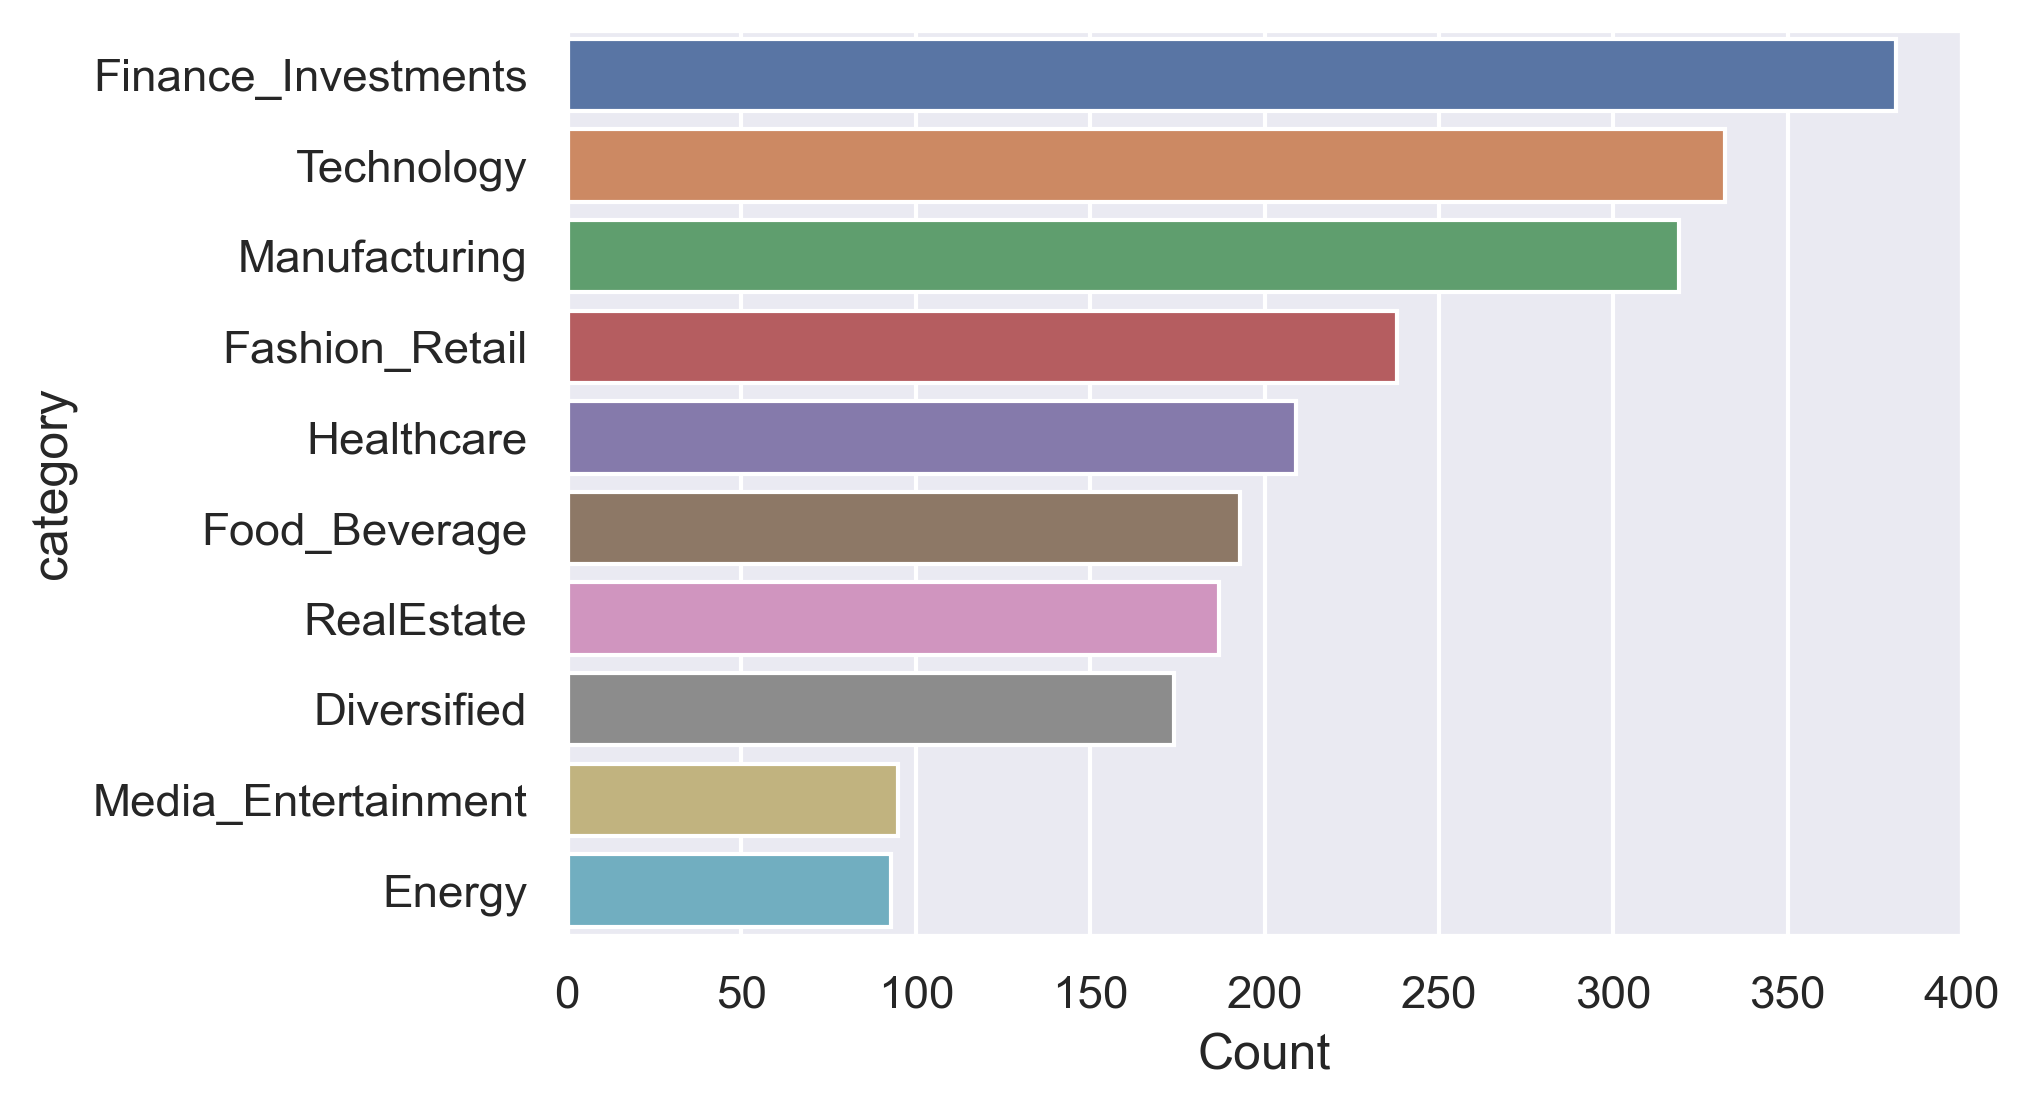

In [35]:
sns.barplot(df_category["Count"][:10], df_category.index[:10])

## The relationship between money and age

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='finalWorth'>

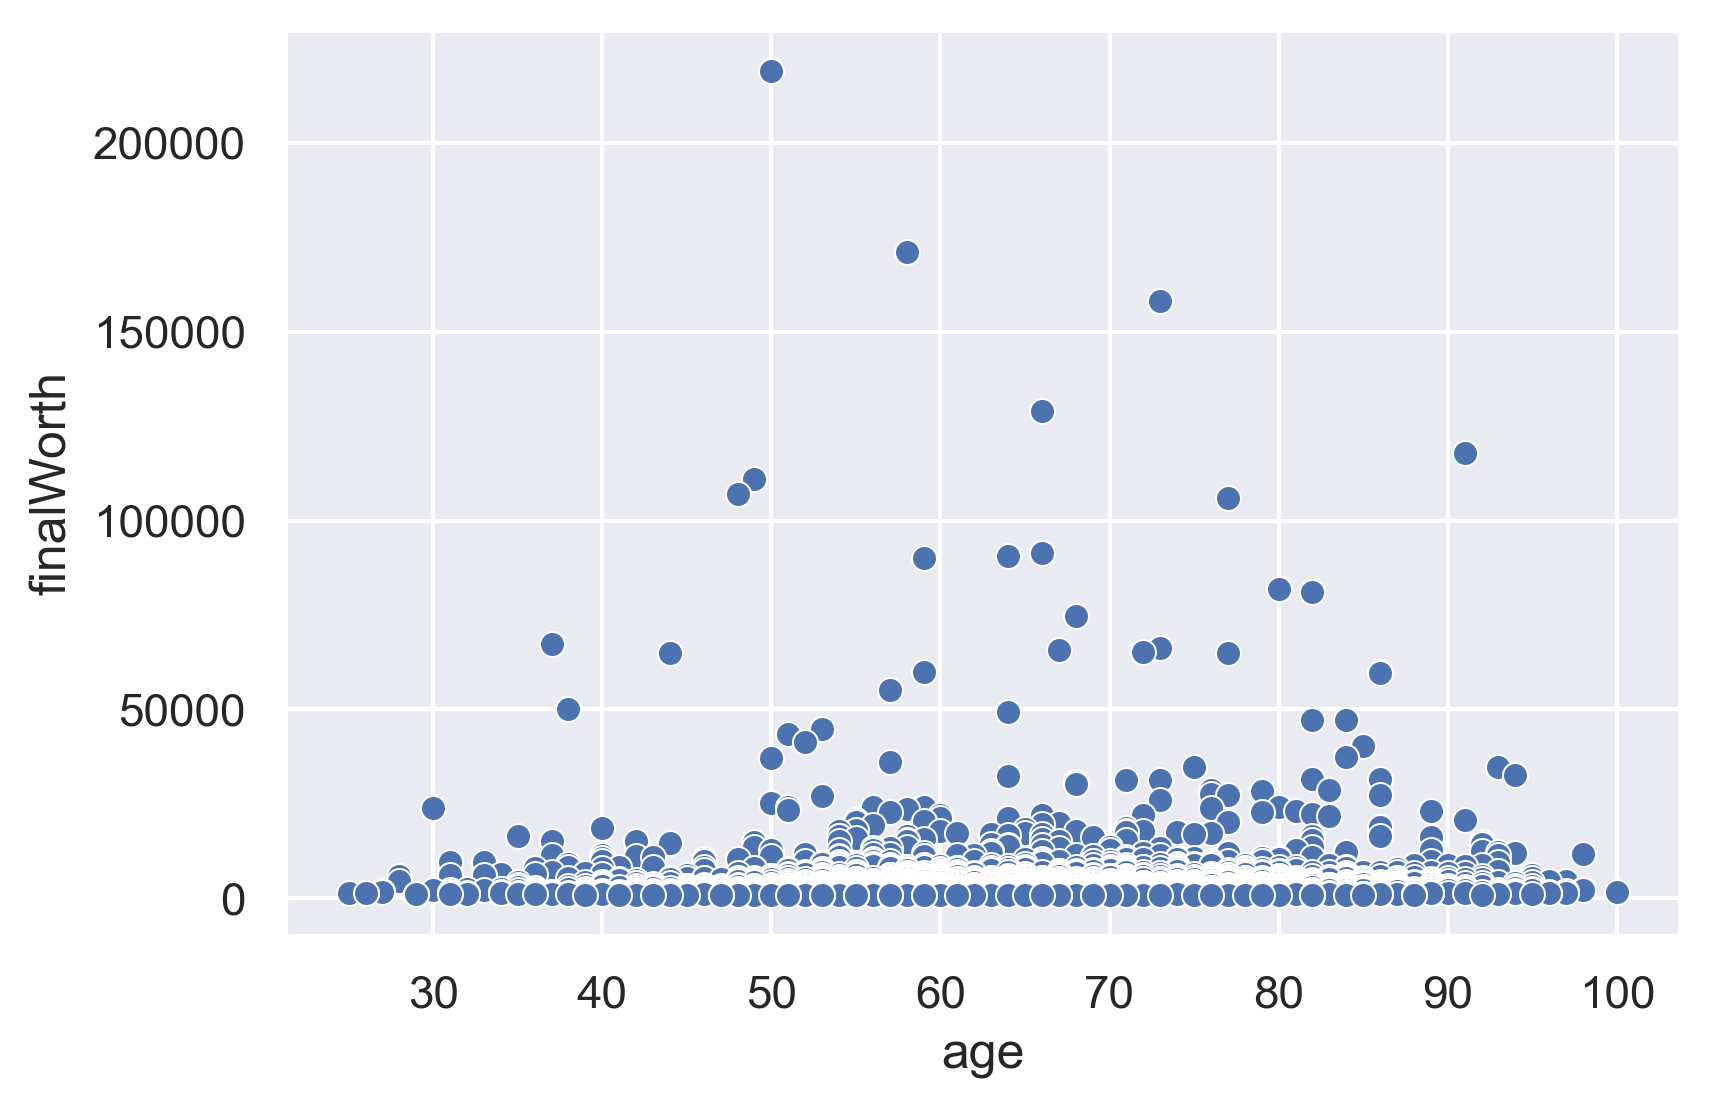

In [36]:
sns.scatterplot(df["age"], df["finalWorth"])

## The distribution of age

<AxesSubplot:xlabel='age', ylabel='Count'>

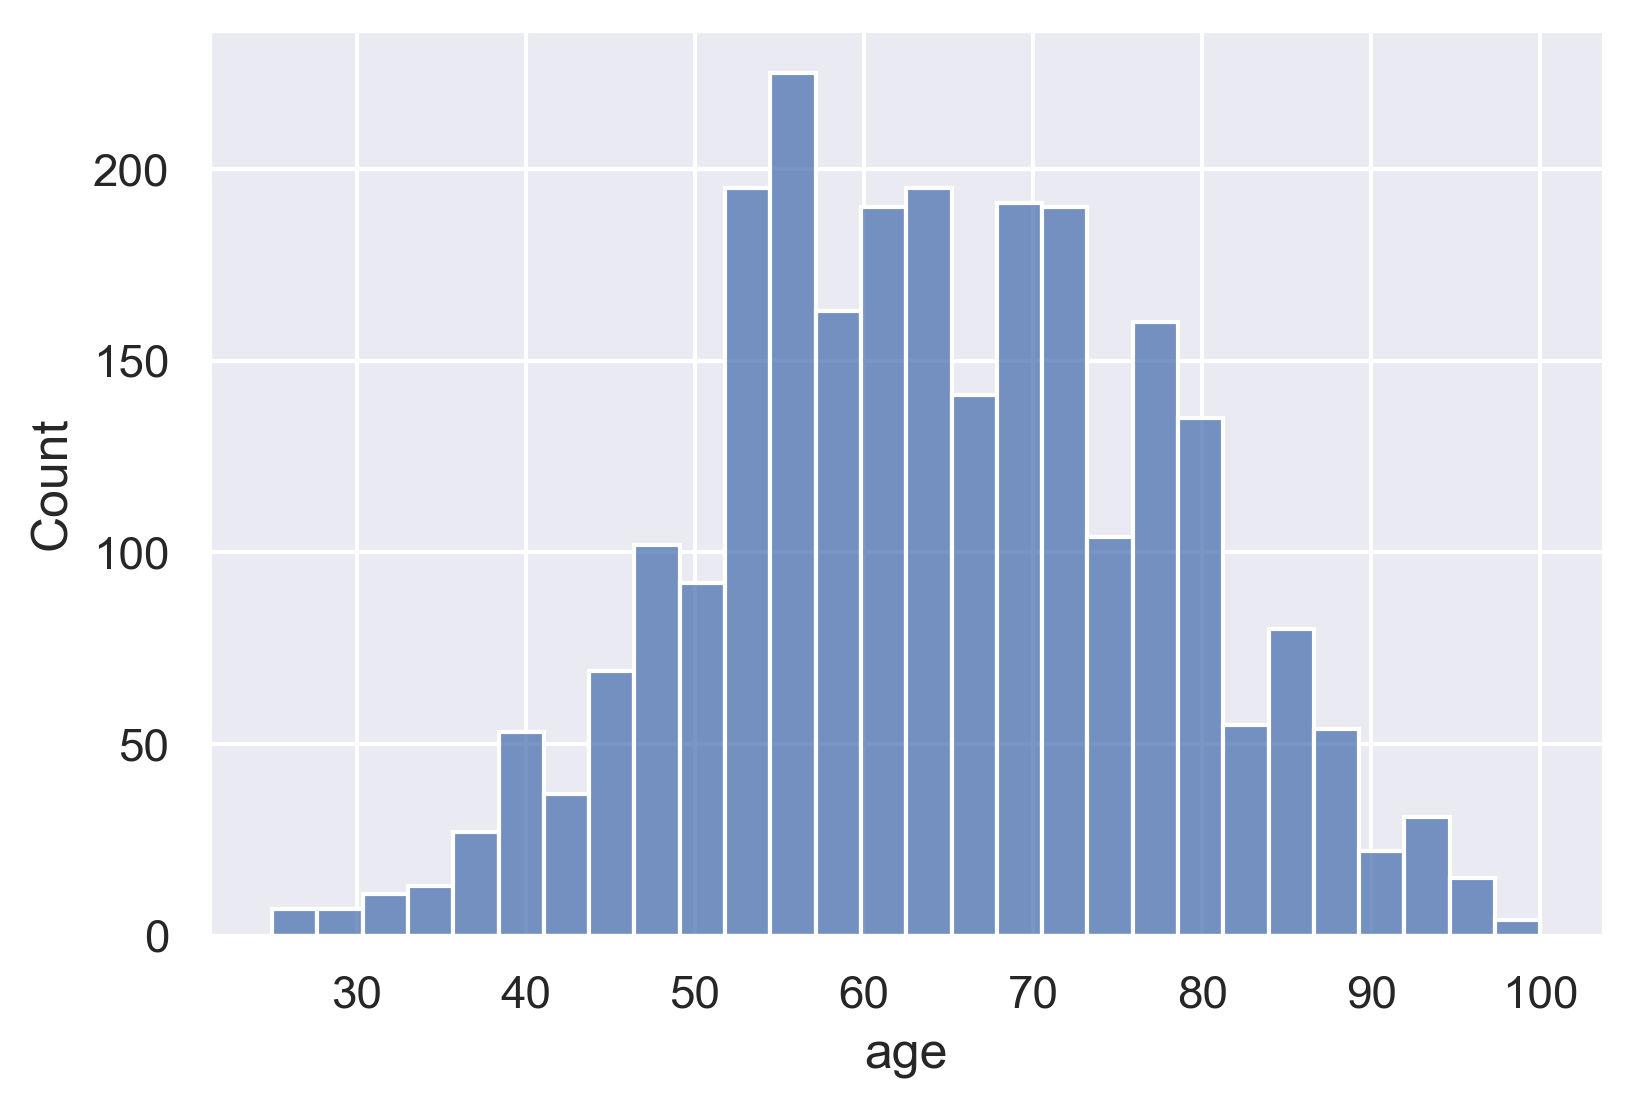

In [37]:
sns.histplot(df["age"])

Don't forget to follow us on [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [GitHub](http://github.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) | [Kaggle](https://www.kaggle.com/tirendazacademy) 😎